# PCA Analysis

### Load imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Set figure styles
sns.set_style("whitegrid")

# Set default color for text and lines to black
sns.set(rc={"axes.facecolor": "white", "axes.edgecolor": "black", "grid.color": "black", 
            "text.color": "black", "xtick.color": "black", "ytick.color": "black", 
            "axes.labelcolor": "black", "figure.facecolor": "white"})


### Load data

In [2]:
intracellular_df = pd.read_csv('../processed_data/intra_gcms.csv', index_col=0)
extracellular_1_df = pd.read_csv('../processed_data/extra_gcms_1.csv', index_col=0)
extracellular_4_df = pd.read_csv('../processed_data/extra_gcms_4.csv', index_col=0)
intracellular_pos_df = pd.read_csv('../processed_data/intra_lcms_pos.csv', index_col=0)
intracellular_neg_df = pd.read_csv('../processed_data/intra_lcms_neg.csv', index_col=0)
extracellular_pos_df = pd.read_csv('../processed_data/extra_lcms_pos.csv', index_col=0)
extracellular_neg_df = pd.read_csv('../processed_data/extra_lcms_neg.csv', index_col=0)

print(f'intracellular_df has shape {intracellular_df.shape}')
print(f'extracellular_1_df has shape {extracellular_1_df.shape}')
print(f'extracellular_4_df has shape {extracellular_4_df.shape}')
print(f'intracellular_pos_df has shape {intracellular_pos_df.shape}')
print(f'intracellular_neg_df has shape {intracellular_neg_df.shape}')
print(f'extracellular_pos_df has shape {extracellular_pos_df.shape}')
print(f'extracellular_neg_df has shape {extracellular_neg_df.shape}')

intracellular_df.head()

intracellular_df has shape (25, 320)
extracellular_1_df has shape (26, 247)
extracellular_4_df has shape (53, 279)
intracellular_pos_df has shape (27, 721)
intracellular_neg_df has shape (27, 665)
extracellular_pos_df has shape (80, 520)
extracellular_neg_df has shape (80, 661)


,2-aminoadipic acid,2'-Deoxycytidine 5'-monophosphoric acid,3-phosphoglycerate,4-aminobutyric acid (GABA),Adenine,Adipic acid,Arachidic acid,Beta-alanine,Carbonate ion,Citric acid,...,Unknown 220,Unknown 221,Unknown 222,Unknown 223,Unknown 224,Unknown 225,Unknown 226,Unknown 227,Unknown 228,Unknown 229
Tags,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,High Confidence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_switchgrass_pvhg6_early_stat_1,206675.073240236,265628.2073572,398155.546965357,461693.997122307,553917.012625364,0.0,39884.14605205,1751763.14357969,1766960.21177728,98325.766858502,...,4.299281e+05,49456.507927,371788.053410,234280.995486,5832.703213,1.645217e+06,351925.677818,24385.393103,217630.729539,198363.596018
in_switchgrass_pvhg6_early_stat_3,341996.103780714,358143.914807286,448290.918266103,496714.999168787,638854.84035566,0.0,84423.2394990384,2040960.80587233,2032543.136365,115405.400973157,...,5.233400e+05,54438.918937,417617.364083,370183.713935,30622.454946,2.054061e+06,492993.409911,61659.348813,214347.074793,200325.541072
in_switchgrass_pvhg6_early_stat_2,263361.804510689,316901.937516122,382225.895834572,549619.810167144,802743.275250288,0.0,65523.7689777048,2144767.05673166,2175518.31265378,157969.941265746,...,5.223632e+05,78126.743977,411800.779492,501043.347306,528.570981,2.814759e+06,305358.590677,0.000000,267134.158139,243310.544402
in_switchgrass_wt_early_stat_1,361520.397329639,158448.34341112,322605.073303065,677195.048082466,710902.55546792,0.0,21587.08362939,1742924.76926073,2187317.70629786,73643.828000748,...,1.094674e+06,68781.500733,389899.251774,53068.346347,41841.431914,4.591185e+05,0.000000,0.000000,0.000000,0.000000


### Define a function to remove rows that are not in the labels_to_keep list
Note: this function only keeps columns with names in the labels to keep list, and only keeps metabolites where 50% of samples have detected it

In [3]:
# define a function to remove rows that are not in the labels_to_keep list
def filter_and_clean_dataframe(df, labels_to_keep):
    df = df.copy()

    new_rows = []

    # loop through the rows of the dataframe and only keep the rows that are in the labels_to_keep list
    for index, row in df.iterrows():
        if index in labels_to_keep:
            new_rows.append(row)

    df = pd.DataFrame(new_rows)

    cols_to_drop = []

    # loop over the columns and remove the columns that are all NaN or all 0
    for column in df.columns:
        # get the values of the column
        col_values = df[column].values

        # determine the fraction of NaN values in the column
        zero_values = [value for value in col_values if float(value) == 0]

        # determine the fraction of 0 values in the column
        zero_fraction = len(zero_values) / len(col_values)

        # if the fraction of NaN values is greater than 0.5, add the column to the list of columns to drop
        if zero_fraction >= 0.5:
            cols_to_drop.append(column)

    # drop the columns in the list
    df = df.drop(cols_to_drop, axis=1)

    return df

# intracellular_df = keep_only_consistent_labels(intracellular_df, labels_to_keep)
# intracellular_df

### Define a list of labels related to early stationary phase wildtype

In [4]:
intracellular_labels = list(intracellular_df.index)

# remove 'Tags' row
labels_to_keep = [label for label in intracellular_labels if label != 'Tags']

# remove the PVHG strain rows to keep only the wild type data
labels_to_keep = [label for label in labels_to_keep if 'pvhg6' not in label]

# make a list of corresponding labels for the extracellular data
extra_labels_to_keep = [label.replace('in_', 'ex_') for label in labels_to_keep]

extra_labels_to_keep

['ex_switchgrass_wt_early_stat_1',
 'ex_switchgrass_wt_early_stat_2',
 'ex_switchgrass_wt_early_stat_3',
 'ex_pvhg_wt_early_stat_1a',
 'ex_pvhg_wt_early_stat_2a',
 'ex_pvhg_wt_early_stat_3a',
 'ex_glc_wt_early_stat_1',
 'ex_glc_wt_early_stat_2',
 'ex_glc_wt_early_stat_3',
 'ex_glc/phe_wt_early_stat_1',
 'ex_glc/phe_wt_early_stat_2',
 'ex_glc/phe_wt_early_stat_3',
 'ex_phe_wt_early_stat_1',
 'ex_phe_wt_early_stat_2',
 'ex_phe_wt_early_stat_3',
 'ex_pvhg_wt_early_stat_1b',
 'ex_pvhg_wt_early_stat_2b',
 'ex_pvhg_wt_early_stat_3b']

### Remove the rows that are not related to early stationary phase wildtype

In [5]:
intracellular_df = filter_and_clean_dataframe(intracellular_df, labels_to_keep)
extracellular_1_df = filter_and_clean_dataframe(extracellular_1_df, extra_labels_to_keep)
extracellular_4_df = filter_and_clean_dataframe(extracellular_4_df, extra_labels_to_keep)
intracellular_pos_df = filter_and_clean_dataframe(intracellular_pos_df, labels_to_keep)
intracellular_neg_df = filter_and_clean_dataframe(intracellular_neg_df, labels_to_keep)
extracellular_pos_df = filter_and_clean_dataframe(extracellular_pos_df, extra_labels_to_keep)
extracellular_neg_df = filter_and_clean_dataframe(extracellular_neg_df, extra_labels_to_keep)

print(f'intracellular_df has shape {intracellular_df.shape}')
print(f'extracellular_1_df has shape {extracellular_1_df.shape}')
print(f'extracellular_4_df has shape {extracellular_4_df.shape}')
print(f'intracellular_pos_df has shape {intracellular_pos_df.shape}')
print(f'intracellular_neg_df has shape {intracellular_neg_df.shape}')
print(f'extracellular_pos_df has shape {extracellular_pos_df.shape}')
print(f'extracellular_neg_df has shape {extracellular_neg_df.shape}')

intracellular_df.head()

intracellular_df has shape (18, 286)
extracellular_1_df has shape (3, 193)
extracellular_4_df has shape (12, 157)
intracellular_pos_df has shape (18, 721)
intracellular_neg_df has shape (18, 665)
extracellular_pos_df has shape (15, 520)
extracellular_neg_df has shape (15, 661)


,2-aminoadipic acid,2'-Deoxycytidine 5'-monophosphoric acid,3-phosphoglycerate,4-aminobutyric acid (GABA),Adenine,Arachidic acid,Beta-alanine,Carbonate ion,Citric acid,Dehydroalanine,...,Unknown 218,Unknown 219,Unknown 220,Unknown 221,Unknown 222,Unknown 223,Unknown 224,Unknown 225,Unknown 227,Unknown 228
in_switchgrass_wt_early_stat_1,361520.397329639,158448.34341112,322605.073303065,677195.048082466,710902.55546792,21587.08362939,1742924.76926073,2187317.70629786,73643.828000748,317216.41938428,...,130212.850373,177862.065221,1.094674e+06,68781.500733,389899.251774,53068.346347,41841.431914,4.591185e+05,0.000000,0.000000
in_switchgrass_wt_early_stat_2,227309.55760657,213583.36610502,312837.42938902,575822.106374466,510742.474927335,30589.6316662972,1362157.06455961,2078919.83564604,85094.117589131,336929.76297088,...,100599.760305,38851.616960,1.009201e+06,1436.631471,329173.115631,25717.116848,68910.728565,3.197350e+05,0.000000,56779.311934
in_switchgrass_wt_early_stat_3,398074.885557321,211939.49668843,296180.63097077,819996.231224398,618736.890582027,43765.31575552,1604466.57278453,2008970.44657791,110175.160063256,515591.82996428,...,170490.319030,110556.183062,1.093756e+06,31836.436103,298349.927472,16888.000000,84416.704355,3.545822e+05,0.000000,89284.602693
in_pvhg_wt_early_stat_1a,15162280.8838296,415540.715236955,271752.376247778,72902.08496758,594252.444514168,30943.57955535,2485640.0470855,1821222.8634703,228090.297121264,220103.450019034,...,248261.955541,45495.945335,5.179437e+05,0.000000,366176.184526,252223.286216,53518.540311,1.859585e+06,88410.560299,84165.419686
in_pvhg_wt_early_stat_2a,18852341.7192045,414698.828302764,282297.43522253,2048534.51426727,631378.749461895,34596.4930274828,3083610.04949007,2065605.09371182,267275.475767908,440350.185467694,...,150835.869799,72655.556268,5.797238e+05,34784.508770,569940.545190,297030.991759,55202.910424,2.384776e+06,0.000000,70356.393692


### Define a function for getting PCA coordinates

In [6]:
def get_pca_coordinates(df):
    # define and run the PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df)

    # create a dataframe with the principal components
    principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
    principal_df.index = df.index

    # add the group to the dataframe for color of the points
    principal_df['Group'] = [label.split('_')[1] for label in principal_df.index]

    # Make a dataframe of the loading scores for the first and second principal components
    ls_df = pd.DataFrame(pca.components_, columns=df.columns, index=['Principal Component 1', 'Principal Component 2'])

    ls_df = ls_df.T

    ls_df['abs_distance'] = [np.sqrt(ls_df.loc[row, 'Principal Component 1']**2 + ls_df.loc[row, 'Principal Component 2']**2) for row in ls_df.index]

    ls_df = ls_df.sort_values('abs_distance', ascending=False)

    return principal_df, ls_df

intracellular_gc_ms_pca, intracellular_gc_ms_ls = get_pca_coordinates(intracellular_df)

display(intracellular_gc_ms_pca)

intracellular_gc_ms_ls


,Principal Component 1,Principal Component 2,Group
in_switchgrass_wt_early_stat_1,1.057445e+08,2.168830e+06,switchgrass
in_switchgrass_wt_early_stat_2,-3.018595e+07,-7.787109e+07,switchgrass
in_switchgrass_wt_early_stat_3,8.916604e+07,-9.273947e+06,switchgrass
in_pvhg_wt_early_stat_1a,1.015579e+08,-2.020429e+07,pvhg
in_pvhg_wt_early_stat_2a,1.156199e+08,2.416396e+06,pvhg
in_pvhg_wt_early_stat_3a,1.138829e+08,-7.043350e+06,pvhg
in_glc_wt_early_stat_1,-1.474468e+08,9.056220e+06,glc
in_glc_wt_early_stat_2,-1.233330e+08,-3.983089e+07,glc
in_glc_wt_early_stat_3,-1.307603e+08,-2.272777e+07,glc
in_glc/phe_wt_early_stat_1,-1.083628e+08,2.393265e+07,glc/phe


,Principal Component 1,Principal Component 2,abs_distance
Trehalose,0.858486,0.445598,0.967242
Unknown 188,-0.413301,0.727942,0.837088
Phosphate Ion,-0.189113,0.481642,0.517439
L-aspartic acid,0.069601,0.122398,0.140803
L-pyroglutamic acid,-0.130638,-0.018517,0.131944
...,...,...,...
Unknown 012,0.000007,0.000053,0.000053
Unknown 134,0.000027,-0.000021,0.000034
Phytanic acid,-0.000024,0.000024,0.000034
Unknown 077,-0.000002,0.000026,0.000026


### Define a function for getting LDA coordinates

In [7]:
def get_lda_coordinates(df):
    df = df.copy()

    # Add the group to the dataframe for color of the points
    groups = [label.split('_')[1] for label in df.index]

    # Define and run the LDA
    lda = LDA(n_components=None)  # Use all linear discriminants

    # Fit the LDA model
    lda_output = lda.fit_transform(df, groups)

    # Convert the LDA results to a dataframe
    lda_columns = [f'Principal Component {i + 1}' for i in range(lda_output.shape[1])]
    lda_df = pd.DataFrame(data=lda_output, columns=lda_columns)
    lda_df['Group'] = groups

    # Get the coefficients (equivalent to loading scores in PCA)
    lda_coefficients = pd.DataFrame(lda.coef_.T, index=df.columns, columns=[f'LD{i + 1} Coef' for i in range(lda.coef_.shape[0])])

    # Sort the coefficients by their magnitude for the first discriminant (LD1)
    lda_coefficients['abs_LD1_LD2_distance'] = [np.sqrt(lda_coefficients.loc[row, 'LD1 Coef']**2 + lda_coefficients.loc[row, 'LD2 Coef']**2) for row in lda_coefficients.index]
    lda_coefficients = lda_coefficients.sort_values(by='abs_LD1_LD2_distance', ascending=False)

    # rename 'LD' columns to 'Principal Component' columns
    lda_coefficients = lda_coefficients.rename(columns={'LD1 Coef': 'Principal Component 1', 'LD2 Coef': 'Principal Component 2'})

    return lda_df, lda_coefficients

# Example usage:
intracellular_gc_ms_lda, lda_coefficients = get_lda_coordinates(intracellular_df)
lda_coefficients


,Principal Component 1,Principal Component 2,LD3 Coef,LD4 Coef,LD5 Coef,abs_LD1_LD2_distance
1-hexadecanol,1.794614e-05,-9.565613e-06,-1.214818e-05,9.514398e-07,1.864771e-06,2.033630e-05
Arachidic acid,1.586774e-05,-4.467788e-06,-7.519790e-06,-7.286387e-06,1.069261e-05,1.648473e-05
Phytanic acid,1.263995e-05,-1.067774e-06,-1.126185e-05,2.818996e-07,-8.741228e-07,1.268497e-05
Unknown 088,-1.207320e-05,1.729186e-06,-1.944455e-06,9.307355e-06,-6.326241e-06,1.219640e-05
Unknown 058,-1.082807e-06,-1.201438e-05,-3.397190e-07,9.476895e-07,1.154152e-05,1.206307e-05
...,...,...,...,...,...,...
Unknown 060,1.307785e-09,-1.224797e-09,-7.431508e-11,-1.696529e-09,3.384386e-09,1.791767e-09
Trehalose,-1.622462e-09,-2.299712e-11,7.869445e-10,8.133953e-10,-7.682760e-10,1.622625e-09
L-pyroglutamic acid,1.400738e-09,-5.615036e-10,2.478712e-10,5.454145e-10,-2.177935e-09,1.509090e-09
Phosphate Ion,1.118649e-09,-3.996384e-10,6.452149e-10,-6.691614e-10,-2.590291e-11,1.187892e-09


### Get PCA components for intra- and extra- GC-MS and LC-MS data

In [8]:
intracellular_gc_ms_pca, intracellular_gc_ms_ls = get_pca_coordinates(intracellular_df)
extracellular_gc_ms_pca, extracellular_gc_ms_ls = get_pca_coordinates(extracellular_4_df)
intracellular_lc_ms_pos_pca, intracellular_lc_ms_pos_ls = get_pca_coordinates(intracellular_pos_df)
extracellular_lc_ms_pos_pca, extracellular_lc_ms_pos_ls = get_pca_coordinates(extracellular_pos_df)

display(intracellular_gc_ms_pca)
intracellular_gc_ms_ls

,Principal Component 1,Principal Component 2,Group
in_switchgrass_wt_early_stat_1,1.057445e+08,2.168830e+06,switchgrass
in_switchgrass_wt_early_stat_2,-3.018595e+07,-7.787109e+07,switchgrass
in_switchgrass_wt_early_stat_3,8.916604e+07,-9.273947e+06,switchgrass
in_pvhg_wt_early_stat_1a,1.015579e+08,-2.020429e+07,pvhg
in_pvhg_wt_early_stat_2a,1.156199e+08,2.416396e+06,pvhg
in_pvhg_wt_early_stat_3a,1.138829e+08,-7.043350e+06,pvhg
in_glc_wt_early_stat_1,-1.474468e+08,9.056220e+06,glc
in_glc_wt_early_stat_2,-1.233330e+08,-3.983089e+07,glc
in_glc_wt_early_stat_3,-1.307603e+08,-2.272777e+07,glc
in_glc/phe_wt_early_stat_1,-1.083628e+08,2.393265e+07,glc/phe


,Principal Component 1,Principal Component 2,abs_distance
Trehalose,0.858486,0.445598,0.967242
Unknown 188,-0.413301,0.727942,0.837088
Phosphate Ion,-0.189113,0.481642,0.517439
L-aspartic acid,0.069601,0.122398,0.140803
L-pyroglutamic acid,-0.130638,-0.018517,0.131944
...,...,...,...
Unknown 012,0.000007,0.000053,0.000053
Unknown 134,0.000027,-0.000021,0.000034
Phytanic acid,-0.000024,0.000024,0.000034
Unknown 077,-0.000002,0.000026,0.000026


### Define a function to generate a PCA plot

In [9]:
def normalize_pca_df(pc_df):
    pc_df = pc_df.copy()
    max_val = max(pc_df['Principal Component 1'].abs().max(), pc_df['Principal Component 2'].abs().max())
    pc_df['Principal Component 1'] = pc_df['Principal Component 1'] / max_val
    pc_df['Principal Component 2'] = pc_df['Principal Component 2'] / max_val
    return pc_df

# Define the plot_pca function to accept an axis parameter
def plot_pca(ax, pc_df, ls_df, title, arrow_length=0.5):
    # Normalize the PCA DataFrame so that max value in either dimension is 1
    pc_df = normalize_pca_df(pc_df)

    # Scatter plot for PCA points
    sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue="Group", data=pc_df, s=100, palette='bright', ax=ax)

    # Normalize each loading vector and scale it to the desired length (0.5)
    for i in range(min(10, len(ls_df))):
        row = ls_df.iloc[i]
        norm = np.sqrt(row['Principal Component 1'] ** 2 + row['Principal Component 2'] ** 2)
        if norm != 0:
            ax.arrow(0, 0,
                     (row['Principal Component 1'] / norm) * arrow_length,
                     (row['Principal Component 2'] / norm) * arrow_length,
                     color='blue', alpha=0.7, head_width=0.02, head_length=0.05, linewidth=2)
            ax.text((row['Principal Component 1'] / norm) * arrow_length * 1.2,
                    (row['Principal Component 2'] / norm) * arrow_length * 1.2,
                    ls_df.index[i], color='black', ha='center', va='center', fontsize=10)

    ax.set_title(title, fontsize=20)
    ax.set_xlabel("Principal Component 1", fontsize=15)
    ax.set_ylabel("Principal Component 2", fontsize=15)

    # Set consistent limits for x and y axes
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)

    # Remove grid lines
    ax.grid(False)

    # Hide the spines around the plot
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    # Add grid lines at x=0 and y=0
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.7)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.7)

    # Position the legend outside the plot
    ax.legend(loc='best')


### Make a 2 x 2 grid of PCA plots

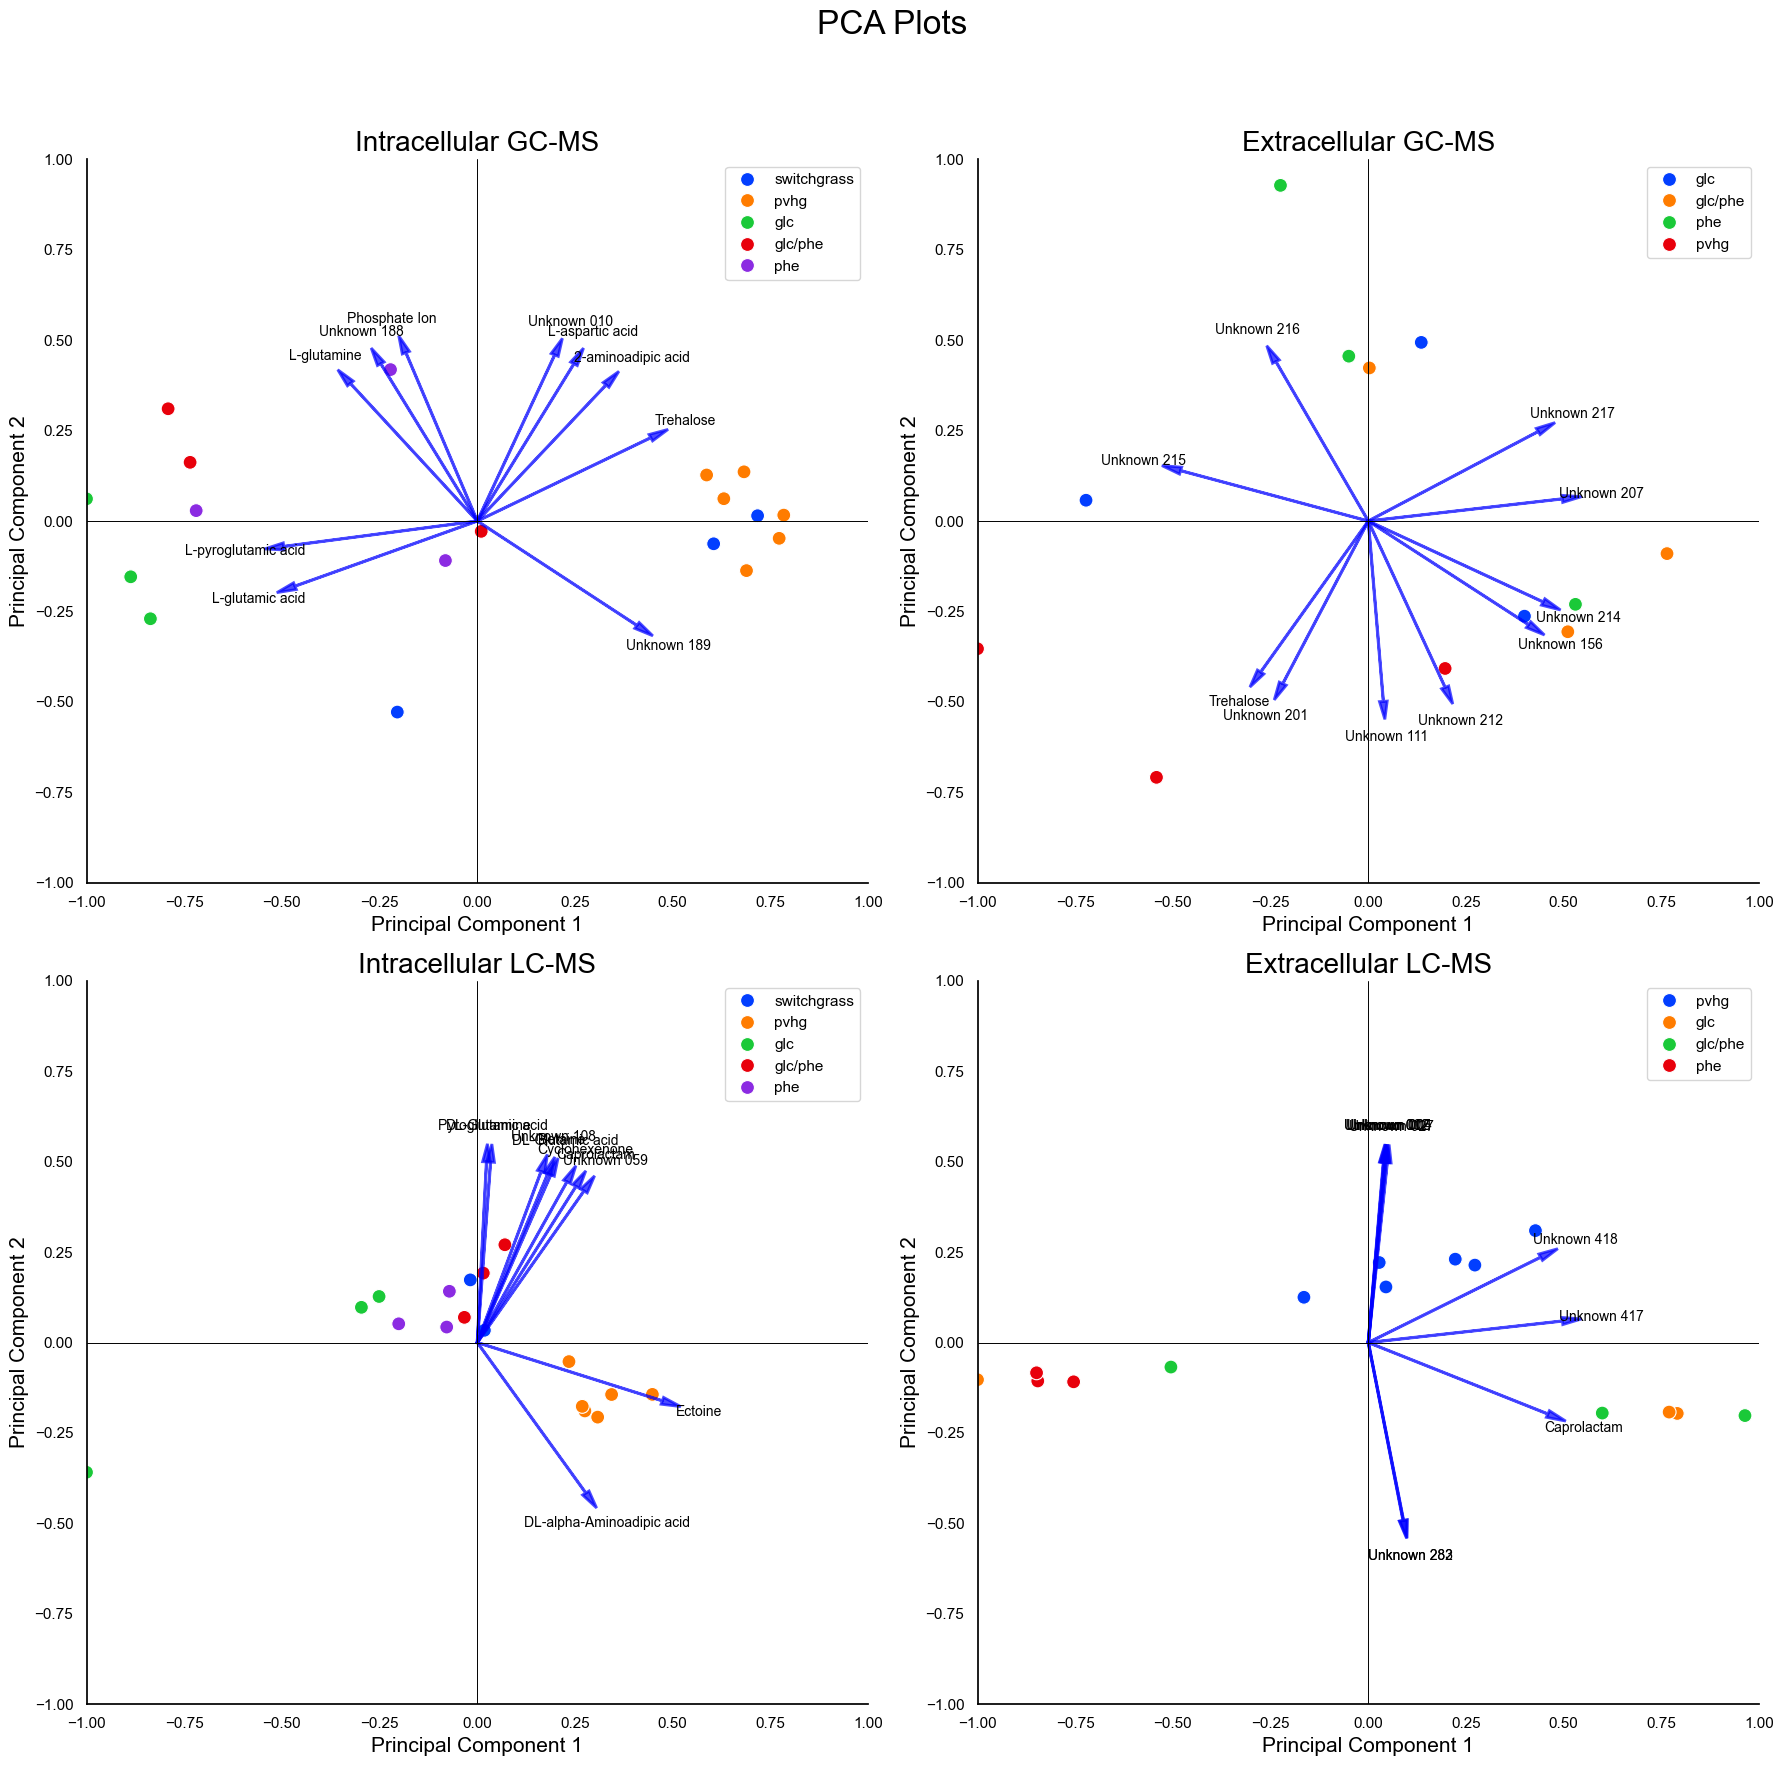

In [10]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 18))


# Plot each PCA plot in a separate subplot
plot_pca(axs[0, 0], intracellular_gc_ms_pca, intracellular_gc_ms_ls,'Intracellular GC-MS')
plot_pca(axs[0, 1], extracellular_gc_ms_pca, extracellular_gc_ms_ls,'Extracellular GC-MS')
plot_pca(axs[1, 0], intracellular_lc_ms_pos_pca, intracellular_lc_ms_pos_ls,'Intracellular LC-MS')
plot_pca(axs[1, 1], extracellular_lc_ms_pos_pca, extracellular_lc_ms_pos_ls, 'Extracellular LC-MS')

# Add an overall title for the entire figure
fig.suptitle('PCA Plots', fontsize=24)

# Adjust layout to make space for the overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plots
plt.show()

In [11]:
display(intracellular_gc_ms_ls.head(10))
display(extracellular_gc_ms_ls.head(10))
display(intracellular_lc_ms_pos_ls.head(10))
display(intracellular_lc_ms_pos_ls.head(10))

,Principal Component 1,Principal Component 2,abs_distance
Trehalose,0.858486,0.445598,0.967242
Unknown 188,-0.413301,0.727942,0.837088
Phosphate Ion,-0.189113,0.481642,0.517439
L-aspartic acid,0.069601,0.122398,0.140803
L-pyroglutamic acid,-0.130638,-0.018517,0.131944
Unknown 189,0.107427,-0.075898,0.131533
L-glutamic acid,-0.094944,-0.036627,0.101764
2-aminoadipic acid,0.053856,0.061522,0.081765
Unknown 010,0.022339,0.051812,0.056422
L-glutamine,-0.034592,0.040517,0.053275


,Principal Component 1,Principal Component 2,abs_distance
Unknown 216,-0.468072,0.872918,0.990493
Unknown 217,0.848054,0.482926,0.975917
Unknown 207,0.218831,0.027034,0.220495
Unknown 156,0.077083,-0.053868,0.094041
Unknown 215,-0.075775,0.021985,0.078900
Unknown 214,0.046040,-0.023020,0.051474
Unknown 111,0.000757,-0.009808,0.009837
Unknown 201,-0.002105,-0.004324,0.004809
Unknown 212,0.001022,-0.002392,0.002601
Trehalose,-0.001292,-0.001959,0.002346


,Principal Component 1,Principal Component 2,abs_distance
Ectoine,0.886307,-0.301519,0.936191
DL-Glutamic acid,0.254353,0.627488,0.677079
Unknown 108,0.179801,0.521150,0.551294
Cyclohexenone,0.096799,0.187573,0.211077
Caprolactam,0.099642,0.170373,0.197371
DL-Glutamine,0.009030,0.192277,0.192489
Betaine,0.054035,0.139861,0.149937
Pyroglutamic acid,0.009410,0.138521,0.138840
Unknown 059,0.069364,0.106512,0.127107
DL-alpha-Aminoadipic acid,0.069804,-0.104577,0.125734


,Principal Component 1,Principal Component 2,abs_distance
Ectoine,0.886307,-0.301519,0.936191
DL-Glutamic acid,0.254353,0.627488,0.677079
Unknown 108,0.179801,0.521150,0.551294
Cyclohexenone,0.096799,0.187573,0.211077
Caprolactam,0.099642,0.170373,0.197371
DL-Glutamine,0.009030,0.192277,0.192489
Betaine,0.054035,0.139861,0.149937
Pyroglutamic acid,0.009410,0.138521,0.138840
Unknown 059,0.069364,0.106512,0.127107
DL-alpha-Aminoadipic acid,0.069804,-0.104577,0.125734


### Get LDA components for intra- and extra- GC-MS and LC-MS data

In [12]:
intracellular_gc_ms_lda, intracellular_gc_ms_lda_ls = get_lda_coordinates(intracellular_df)
extracellular_gc_ms_lda, extracellular_gc_ms_lda_ls = get_lda_coordinates(extracellular_4_df)
intracellular_lc_ms_pos_lda, intracellular_lc_ms_pos_lda_ls = get_lda_coordinates(intracellular_pos_df)
extracellular_lc_ms_pos_lda, extracellular_lc_ms_pos_lda_ls = get_lda_coordinates(extracellular_pos_df)

intracellular_gc_ms_ls

,Principal Component 1,Principal Component 2,abs_distance
Trehalose,0.858486,0.445598,0.967242
Unknown 188,-0.413301,0.727942,0.837088
Phosphate Ion,-0.189113,0.481642,0.517439
L-aspartic acid,0.069601,0.122398,0.140803
L-pyroglutamic acid,-0.130638,-0.018517,0.131944
...,...,...,...
Unknown 012,0.000007,0.000053,0.000053
Unknown 134,0.000027,-0.000021,0.000034
Phytanic acid,-0.000024,0.000024,0.000034
Unknown 077,-0.000002,0.000026,0.000026


### Make a 2 x 2 grid of LDA plots

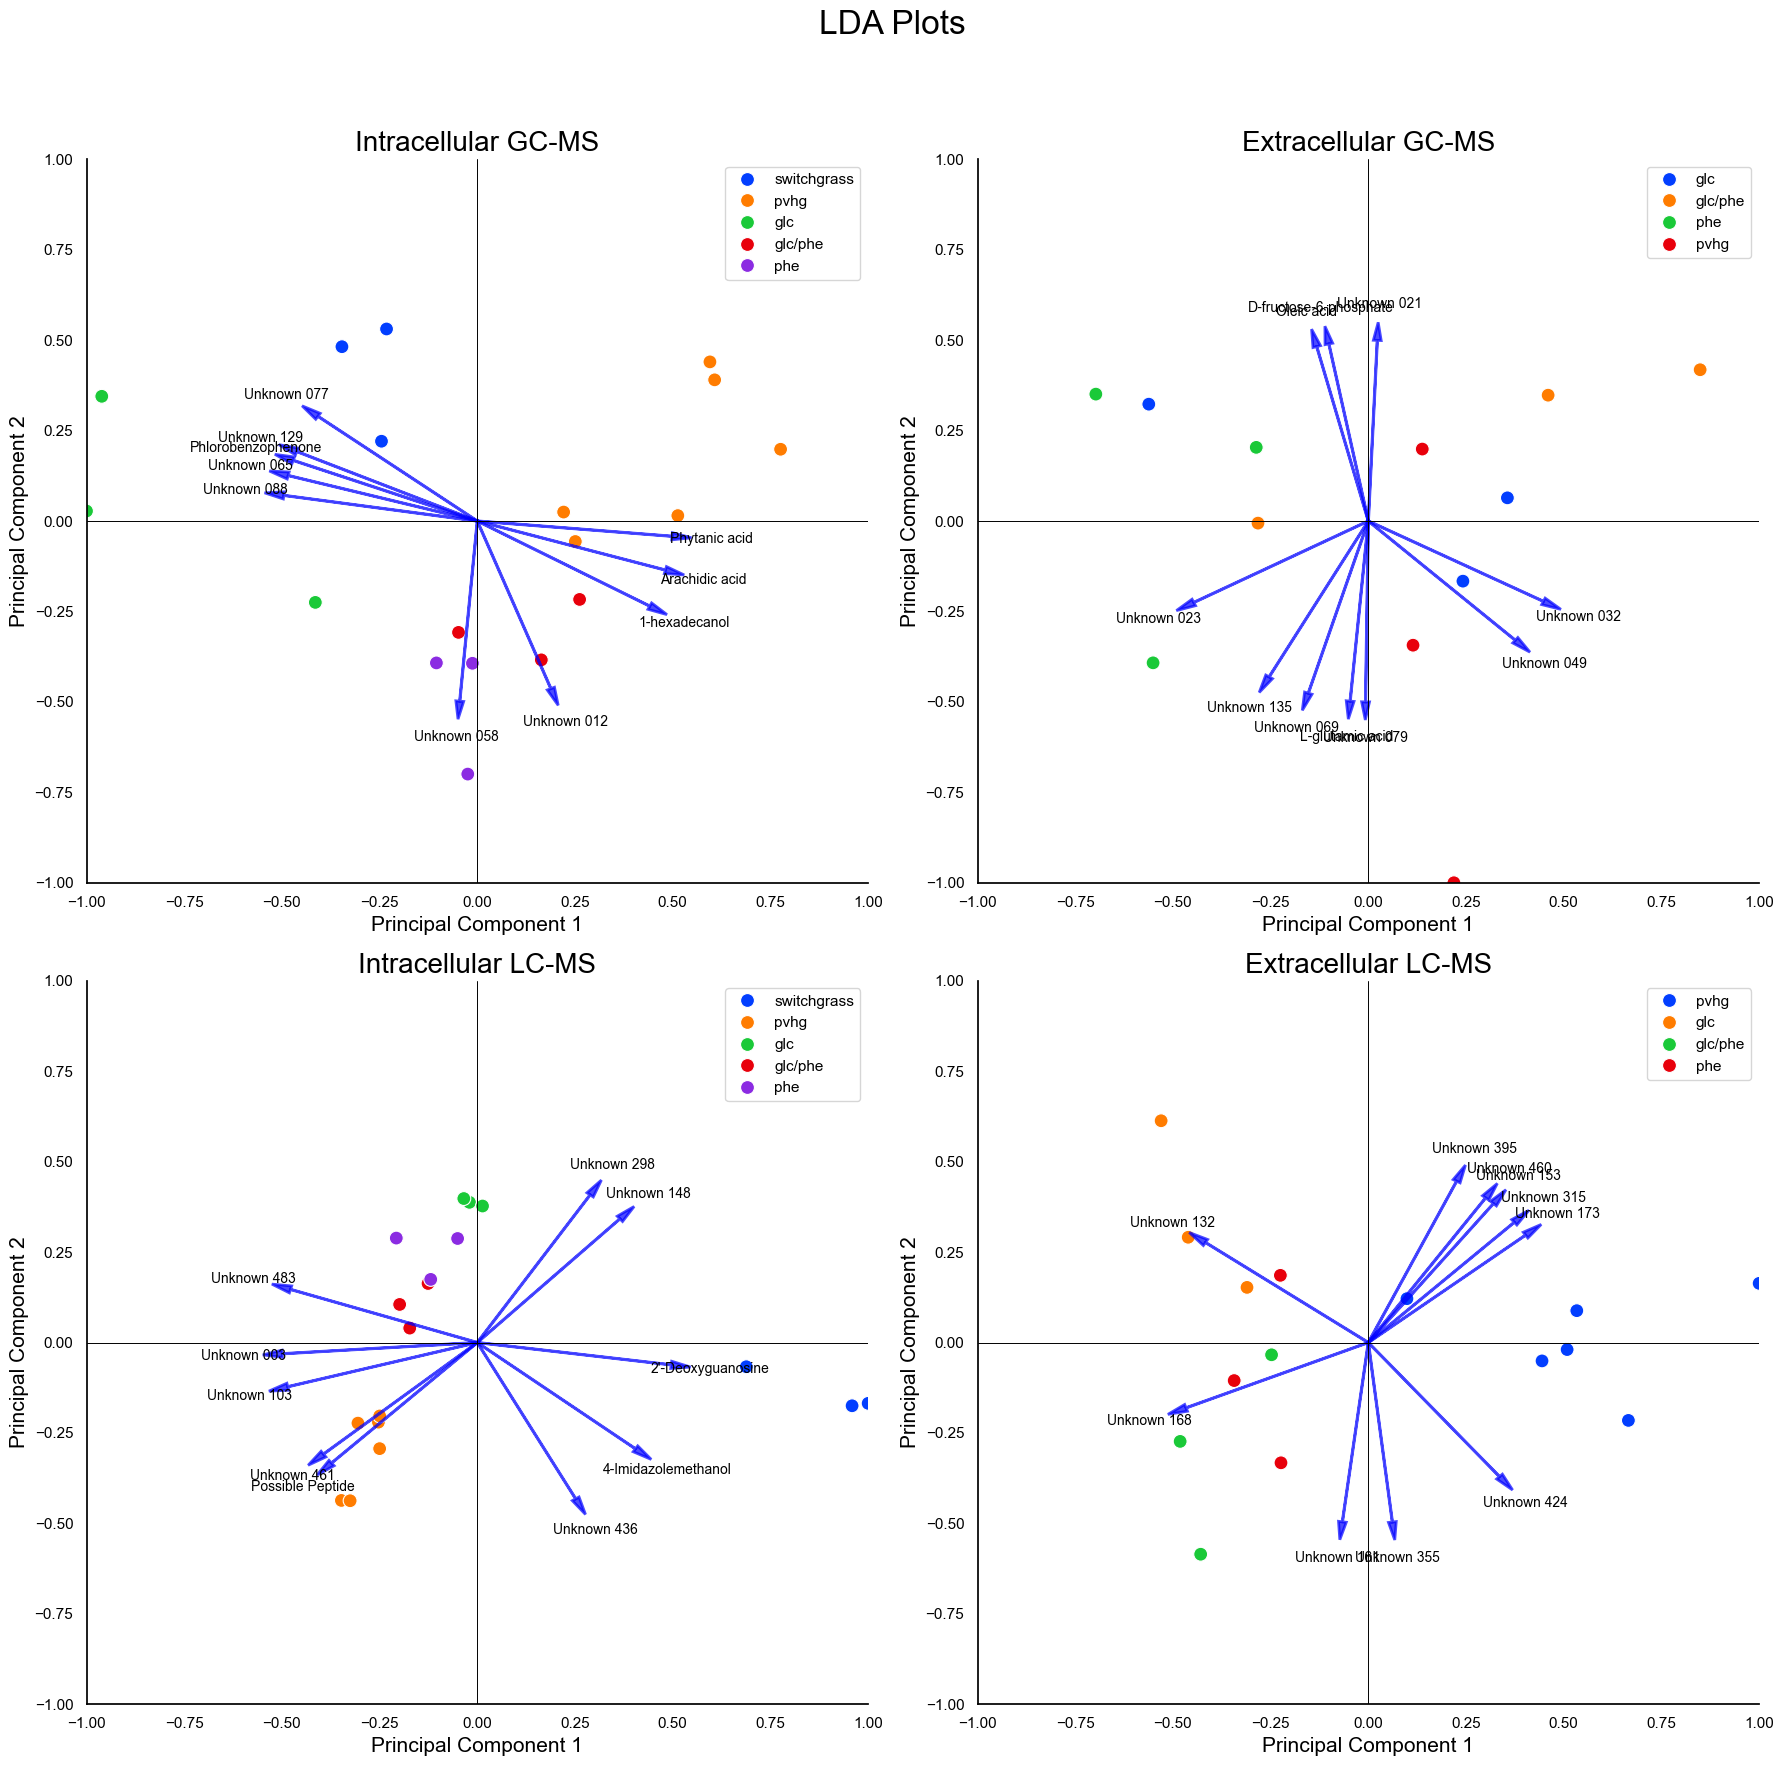

In [13]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 18))

# Plot each PCA plot in a separate subplot
plot_pca(axs[0, 0], intracellular_gc_ms_lda, intracellular_gc_ms_lda_ls, 'Intracellular GC-MS')
plot_pca(axs[0, 1], extracellular_gc_ms_lda, extracellular_gc_ms_lda_ls, 'Extracellular GC-MS')
plot_pca(axs[1, 0], intracellular_lc_ms_pos_lda, intracellular_lc_ms_pos_lda_ls, 'Intracellular LC-MS')
plot_pca(axs[1, 1], extracellular_lc_ms_pos_lda, extracellular_lc_ms_pos_lda_ls, 'Extracellular LC-MS')

# Add an overall title for the entire figure
fig.suptitle('LDA Plots', fontsize=24)

# Adjust layout to make space for the overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plots
plt.show()

In [16]:
display(intracellular_gc_ms_lda_ls.head(10))
display(extracellular_gc_ms_lda_ls.head(10))
display(intracellular_lc_ms_pos_lda_ls.head(10))
display(intracellular_lc_ms_pos_lda_ls.head(10))

,Principal Component 1,Principal Component 2,LD3 Coef,LD4 Coef,LD5 Coef,abs_LD1_LD2_distance
1-hexadecanol,0.000018,-0.000010,-1.214818e-05,9.514398e-07,1.864771e-06,0.000020
Arachidic acid,0.000016,-0.000004,-7.519790e-06,-7.286387e-06,1.069261e-05,0.000016
Phytanic acid,0.000013,-0.000001,-1.126185e-05,2.818996e-07,-8.741228e-07,0.000013
Unknown 088,-0.000012,0.000002,-1.944455e-06,9.307355e-06,-6.326241e-06,0.000012
Unknown 058,-0.000001,-0.000012,-3.397190e-07,9.476895e-07,1.154152e-05,0.000012
Unknown 065,-0.000010,0.000003,-1.504146e-06,4.451810e-06,6.910010e-08,0.000010
Unknown 129,-0.000009,0.000004,3.262321e-06,5.256761e-06,-8.517851e-06,0.000010
Unknown 012,0.000003,-0.000008,3.594374e-06,-2.294594e-06,5.966995e-06,0.000009
Unknown 077,-0.000007,0.000005,-5.051305e-06,3.111253e-06,8.291235e-07,0.000008
Phlorobenzophenone,-0.000006,0.000002,-1.523539e-06,3.242758e-06,-8.868212e-07,0.000007


,Principal Component 1,Principal Component 2,LD3 Coef,LD4 Coef,abs_LD1_LD2_distance
L-glutamic acid,-6.143212e-07,-0.000007,-0.000001,8.329837e-06,0.000007
Unknown 135,-2.880572e-06,-0.000005,0.000005,2.410273e-06,0.000006
Unknown 079,-7.291248e-08,-0.000005,0.000004,7.973028e-07,0.000005
D-fructose-6-phosphate,-9.970328e-07,0.000005,-0.000006,1.756902e-06,0.000005
Unknown 032,3.443598e-06,-0.000002,-0.000002,4.431959e-07,0.000004
Oleic acid,-9.240071e-07,0.000003,-0.000003,8.304685e-07,0.000004
Unknown 023,-2.444514e-06,-0.000001,0.000001,2.409949e-06,0.000003
Unknown 049,1.932530e-06,-0.000002,-0.000002,1.391121e-06,0.000003
Unknown 069,-6.738661e-07,-0.000002,0.000003,1.278825e-07,0.000002
Unknown 021,9.510013e-08,0.000002,-0.000003,8.196194e-07,0.000002


,Principal Component 1,Principal Component 2,LD3 Coef,LD4 Coef,LD5 Coef,abs_LD1_LD2_distance
Unknown 298,7.392509e-07,1.045669e-06,1.100221e-06,5.836329e-07,-4.052407e-06,1.280592e-06
Possible Peptide,-6.303709e-07,-5.630694e-07,-1.815216e-06,1.556383e-06,-1.041103e-07,8.452305e-07
Unknown 436,4.200133e-07,-7.210540e-07,-3.758676e-07,-8.084599e-07,2.293828e-06,8.344639e-07
Unknown 148,6.065914e-07,5.685789e-07,3.696033e-07,-9.268342e-07,3.088948e-07,8.314055e-07
2'-Deoxyguanosine,8.205463e-07,-1.019499e-07,-8.694033e-08,-3.733061e-07,1.149562e-07,8.268555e-07
4-Imidazolemethanol,6.281025e-07,-4.560080e-07,-1.992211e-07,-5.318506e-07,1.090828e-06,7.761804e-07
Unknown 003,-7.359898e-07,-4.573474e-08,-1.796222e-07,6.152408e-07,-2.691348e-07,7.374094e-07
Unknown 103,-7.134604e-07,-1.797426e-07,-7.007251e-07,8.852328e-07,-1.765375e-07,7.357535e-07
Unknown 483,-6.964526e-07,2.140211e-07,1.517387e-08,1.129720e-06,-1.792183e-06,7.285954e-07
Unknown 461,-5.441193e-07,-4.264369e-07,-3.264869e-07,4.372278e-07,4.225876e-07,6.913134e-07


,Principal Component 1,Principal Component 2,LD3 Coef,LD4 Coef,LD5 Coef,abs_LD1_LD2_distance
Unknown 298,7.392509e-07,1.045669e-06,1.100221e-06,5.836329e-07,-4.052407e-06,1.280592e-06
Possible Peptide,-6.303709e-07,-5.630694e-07,-1.815216e-06,1.556383e-06,-1.041103e-07,8.452305e-07
Unknown 436,4.200133e-07,-7.210540e-07,-3.758676e-07,-8.084599e-07,2.293828e-06,8.344639e-07
Unknown 148,6.065914e-07,5.685789e-07,3.696033e-07,-9.268342e-07,3.088948e-07,8.314055e-07
2'-Deoxyguanosine,8.205463e-07,-1.019499e-07,-8.694033e-08,-3.733061e-07,1.149562e-07,8.268555e-07
4-Imidazolemethanol,6.281025e-07,-4.560080e-07,-1.992211e-07,-5.318506e-07,1.090828e-06,7.761804e-07
Unknown 003,-7.359898e-07,-4.573474e-08,-1.796222e-07,6.152408e-07,-2.691348e-07,7.374094e-07
Unknown 103,-7.134604e-07,-1.797426e-07,-7.007251e-07,8.852328e-07,-1.765375e-07,7.357535e-07
Unknown 483,-6.964526e-07,2.140211e-07,1.517387e-08,1.129720e-06,-1.792183e-06,7.285954e-07
Unknown 461,-5.441193e-07,-4.264369e-07,-3.264869e-07,4.372278e-07,4.225876e-07,6.913134e-07
